In [1]:
!pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename="lena.jpg"

(1960, 1960, 3)
(196, 196, 3)


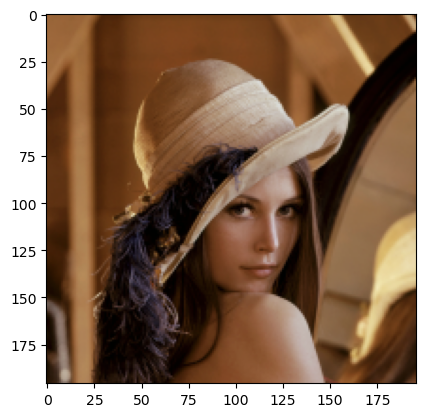

In [3]:
img=cv2.imread(filename, cv2.IMREAD_COLOR)
print(img.shape)

scale_percent = 10 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
print(img.shape)
plt.show()

[[104 102 101 ... 118  58  31]
 [103 102 101 ... 145  97  41]
 [102 102 101 ... 161 131  74]
 ...
 [ 20  20  25 ...  46  53  56]
 [ 22  21  24 ...  57  61  62]
 [ 25  22  26 ...  66  69  70]]


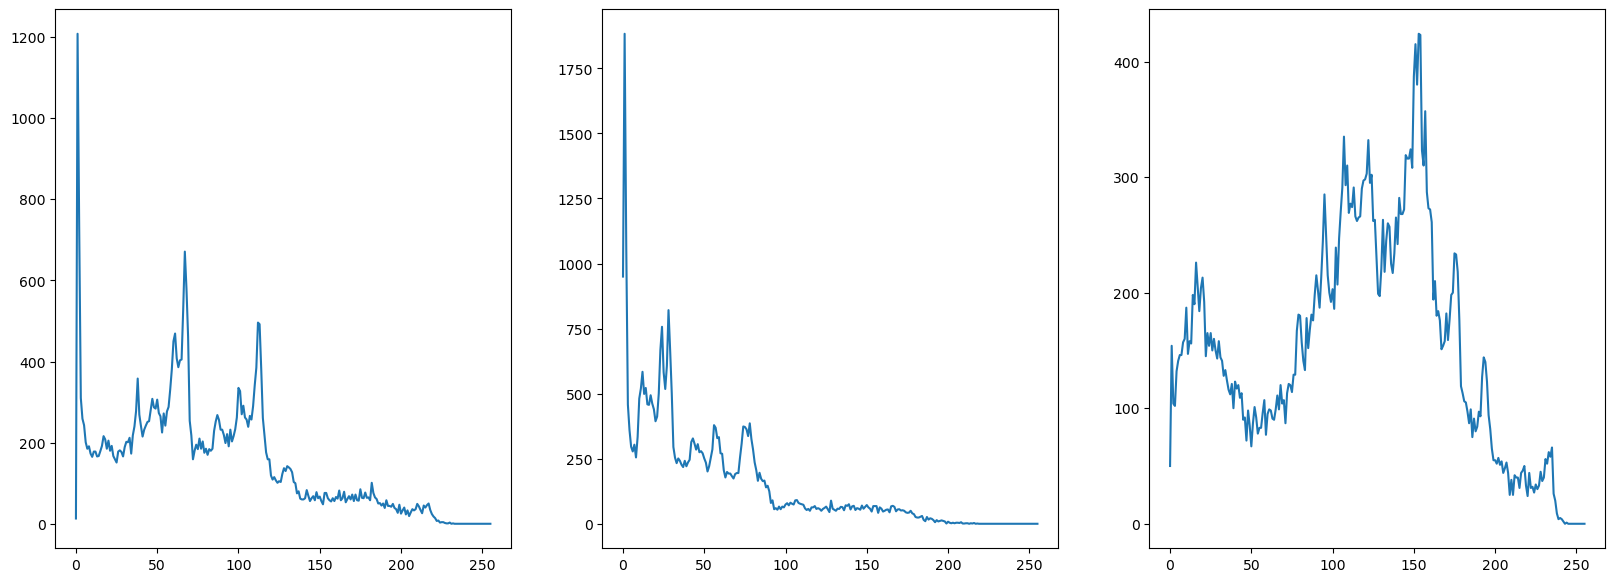

In [4]:
def genHistogram(array):
    hist=[0]*256   #mảng 0 1 chiều để tính xác suất các mức xám
    flatten_data=array.flatten()  #đưa ảnh về mảng một chiều
    for item in flatten_data:
        hist[item] += 1       # tính số lần xuất hiện của các mức xám
    return hist


print(img[:,:,1])
greenHist=genHistogram(img[:,:,1])   # kênh màu green
blueHist=genHistogram(img[:,:,0])
redHist=genHistogram(img[:,:,2])

fig=plt.figure(figsize=[20,7])

p=plt.subplot(131)
plt.plot(greenHist)

p=plt.subplot(132)
plt.plot(blueHist)

p=plt.subplot(133)
plt.plot(redHist)



[[104 102 101 ... 118  58  31]
 [103 102 101 ... 145  97  41]
 [102 102 101 ... 161 131  74]
 ...
 [ 20  20  25 ...  46  53  56]
 [ 22  21  24 ...  57  61  62]
 [ 25  22  26 ...  66  69  70]]


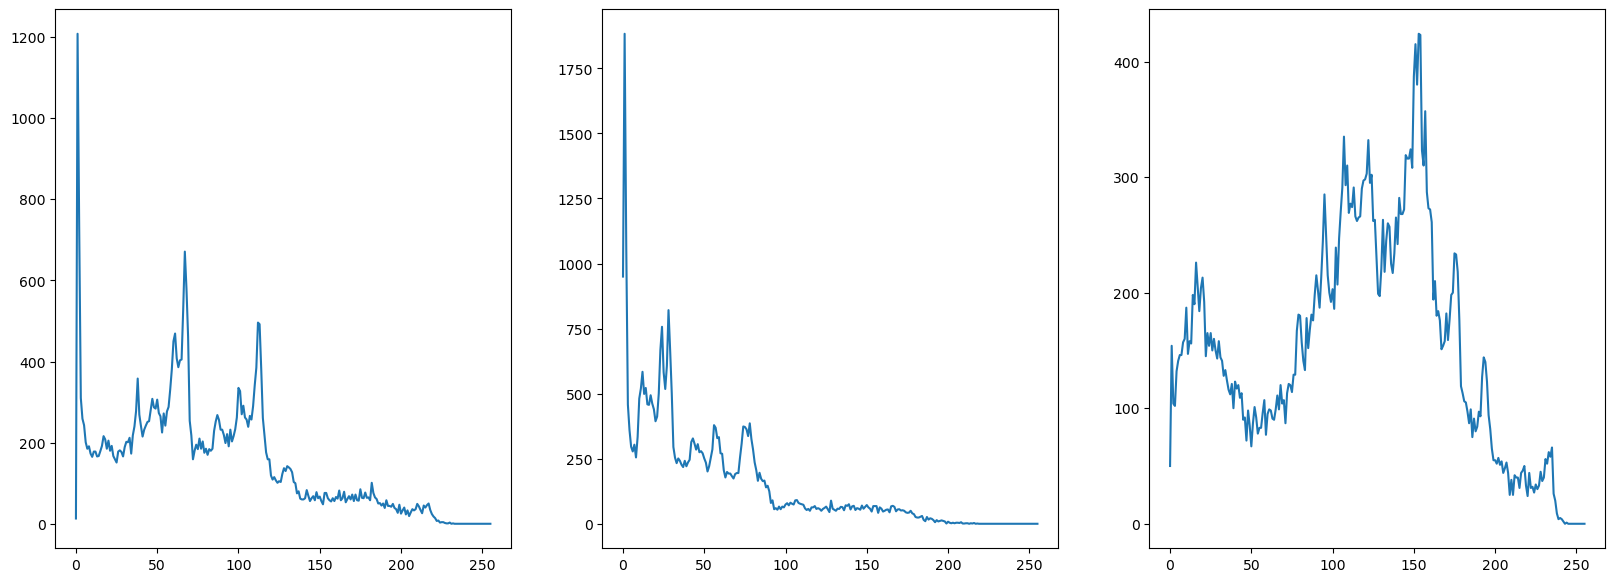

In [5]:
#Cái nào cao quá cho về 0
def suppressSpikes(array, threshold=2000):
    for i, value in enumerate(array):
        if value > threshold:
            array[i]=0
print(img[:,:,1])
greenHist=genHistogram(img[:,:,1])   # kênh màu green
blueHist=genHistogram(img[:,:,0])
redHist=genHistogram(img[:,:,2])

suppressSpikes(greenHist)
suppressSpikes(blueHist)
suppressSpikes(redHist)

fig=plt.figure(figsize=[20,7])

p=plt.subplot(131)
plt.plot(greenHist)

p=plt.subplot(132)
plt.plot(blueHist)

p=plt.subplot(133)
plt.plot(redHist)

        


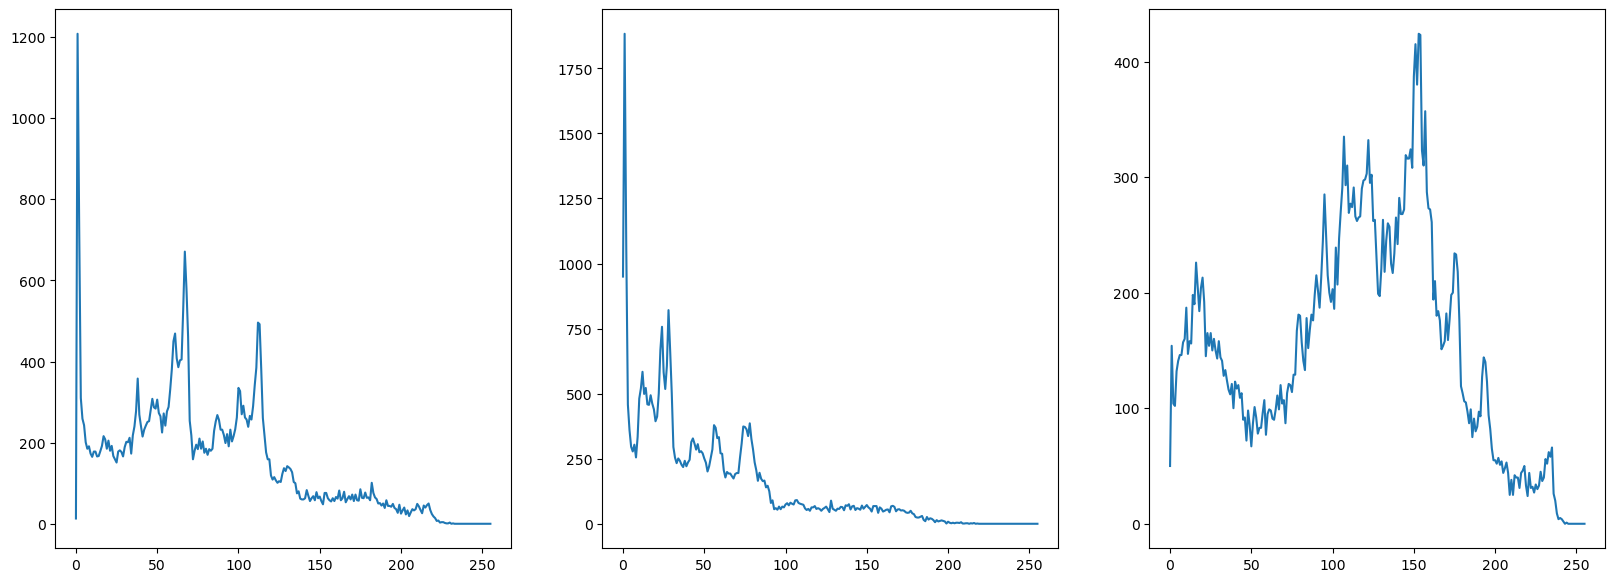

In [6]:
#Cái nào cao quá cho về 0
def suppressSpikes(histogram,channel, threshold=2000):
    suppressedValues=[]
    for i, value in enumerate(histogram):
        if value > threshold:
            suppressedValues.append(i)
            
    for i in range(channel.shape[0]):
        for j in range(channel.shape[1]):
            if channel[i][j] in suppressedValues:
                channel[i][j]=np.random.randint(50,150)
#                 if channel[i][j] < 64:
#                     channel[i][j]=np.random.randint(channel[i][j],channel[i][j]+20)
#                 elif channel[i][j] > 192: #128+64 
#                     channel[i][j]=np.random.randint(channel[i][j],channel[i][j]-20)

greenChannel=img[:,:,1]
blueChannel=img[:,:,0]
redChannel=img[:,:,2]

greenHist=genHistogram(greenChannel)   # kênh màu green
blueHist=genHistogram(blueChannel)
redHist=genHistogram(redChannel)

suppressSpikes(greenHist,greenChannel )
suppressSpikes(blueHist, blueChannel)
suppressSpikes(redHist, redChannel)

fig=plt.figure(figsize=[20,7])

p=plt.subplot(131)
plt.plot(greenHist)

p=plt.subplot(132)
plt.plot(blueHist)

p=plt.subplot(133)
plt.plot(redHist)

        

[[[159 104  58]
  [157 102  57]
  [156 101  57]
  ...
  [161 118  77]
  [ 98  58  24]
  [ 57  31   7]]

 [[159 103  58]
  [157 102  58]
  [154 101  57]
  ...
  [182 145 101]
  [141  97  57]
  [ 74  41  12]]

 [[157 102  58]
  [155 102  58]
  [154 101  57]
  ...
  [194 161 117]
  [171 131  90]
  [115  74  35]]

 ...

 [[ 35  20   2]
  [ 35  20   3]
  [ 42  25  11]
  ...
  [ 81  46  25]
  [ 90  53  28]
  [ 95  56  29]]

 [[ 41  22   3]
  [ 38  21   4]
  [ 42  24  10]
  ...
  [ 93  57  32]
  [101  61  35]
  [104  62  35]]

 [[ 46  25   5]
  [ 39  22   5]
  [ 43  26   9]
  ...
  [106  66  43]
  [110  69  45]
  [113  70  43]]]
(196, 196, 3)


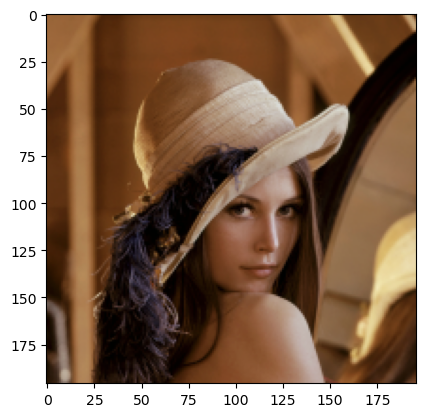

In [7]:
newImage=np.dstack((redChannel,greenChannel, blueChannel))
print(newImage)
print(newImage.shape)
plt.imshow(newImage)

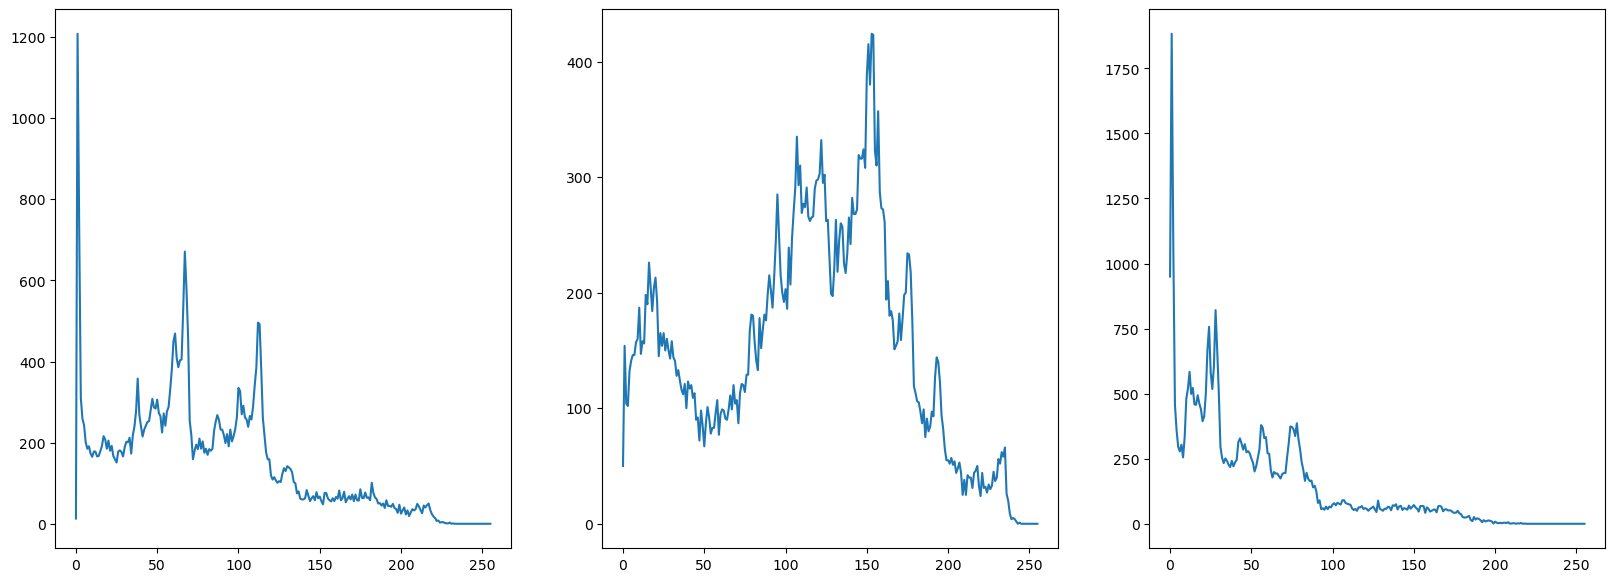

In [8]:
greenChannel=newImage[:,:,1]
blueChannel=newImage[:,:,0]
redChannel=newImage[:,:,2]

greenHist=genHistogram(greenChannel)   # kênh màu green
blueHist=genHistogram(blueChannel)
redHist=genHistogram(redChannel)

fig=plt.figure(figsize=[20,7])

p=plt.subplot(131)
plt.plot(greenHist)

p=plt.subplot(132)
plt.plot(blueHist)

p=plt.subplot(133)
plt.plot(redHist)